# Maternal Health Predictions

1. [Project Summary](#projectsummary)
    * 1.1 [Background](#projectbackground)
    * 1.2 [Dataset](#dataset)
2. [Imports and Early Data Exploration](#imports)
    * 2.1 [Data Exploration](#DataExp)
    * 2.2 [Key Observations](#KeyObs)
3.  [Neural Network Model](#NNmodel)
    * 3.1 [Model Building](#MB)
    * 3.2 [Conclusions](#conc)

## 1. Project Summary <a class="anchor" id="projectsummary"></a>

#### 1.1 Project Background <a class="anchor" id="projectbackground"></a>

Inspiration for this project came as at the time of working on this project I am expecting my first child, so this is kind of my nerdy way of fully understanding Maternal Health. I am attempting to pinpoint key trends that will establish the level of risk associated with maternal complications for an expecting mother. Creating an accurate model in this context will supply healthcare experts with a system to accentuate patients who will necessitate extra care and attention over the course of their pregnancy.

#### 1.2 Dataset <a class="anchor" id="dataset"></a>

Data has been collected from different hospitals, community clinics, and maternal health cares. It was collected through the IoT based risk monitoring system with data from rural areas of Bangladesh. It contains the following columns:

* Age: year when the woman was pregnant.
* SystolicBP: Upper value of Blood Pressure in mmHg.
* DiastolicBP: Lower value of Blood Pressure in mmHg.
* BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
* BodyTemp: Body temperature measured in fahrenheit
* HeartRate: A normal resting heart rate in beats per minute.
* Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

## 2. Imports and Early Data Exploration <a class="anchor" id="imports"></a>

#### 2.1 Project Background <a class="anchor" id="DataExp"></a>

In [1]:
# Imports
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Reads CSV
dataset = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
# Display head of dataset
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# Displays info on columns, note that there are no null columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
# Describe int/float figures in the dataset
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'BS'}>],
       [<Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>]], dtype=object)

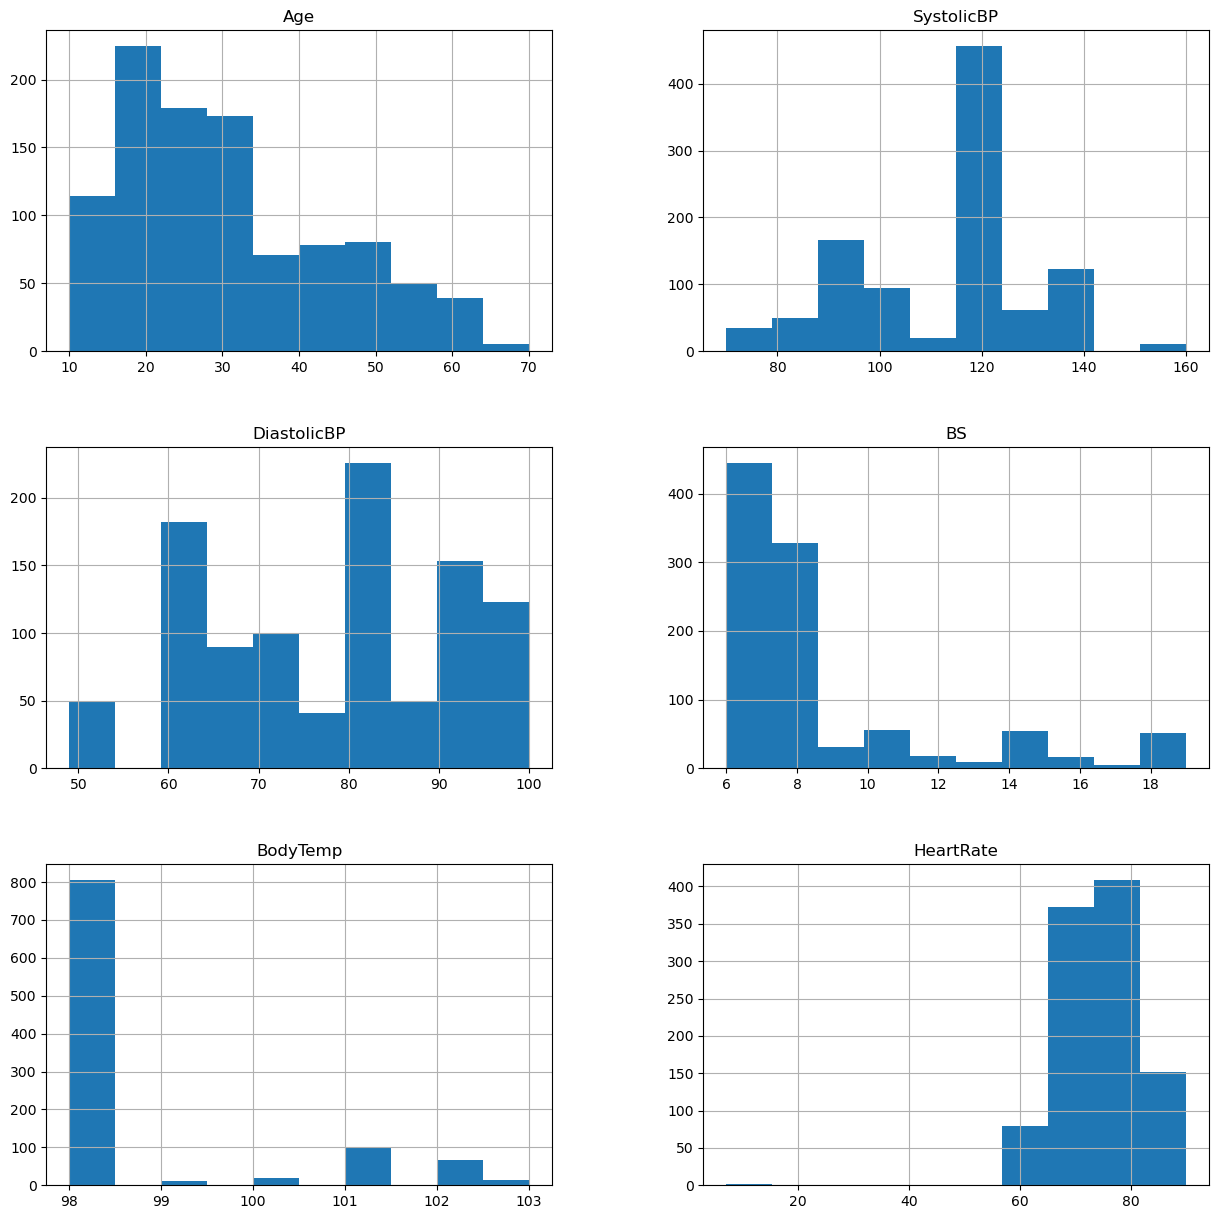

In [6]:
# Displays data as histogram
dataset.hist(layout=(3,2), figsize=(15,15))

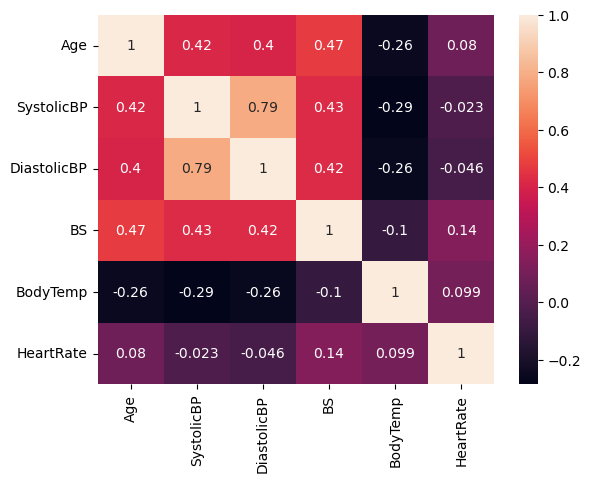

In [7]:
# View correlation heatmap of features
sns.heatmap(dataset.corr(numeric_only=True), annot = True)
plt.show()

KeyboardInterrupt: 

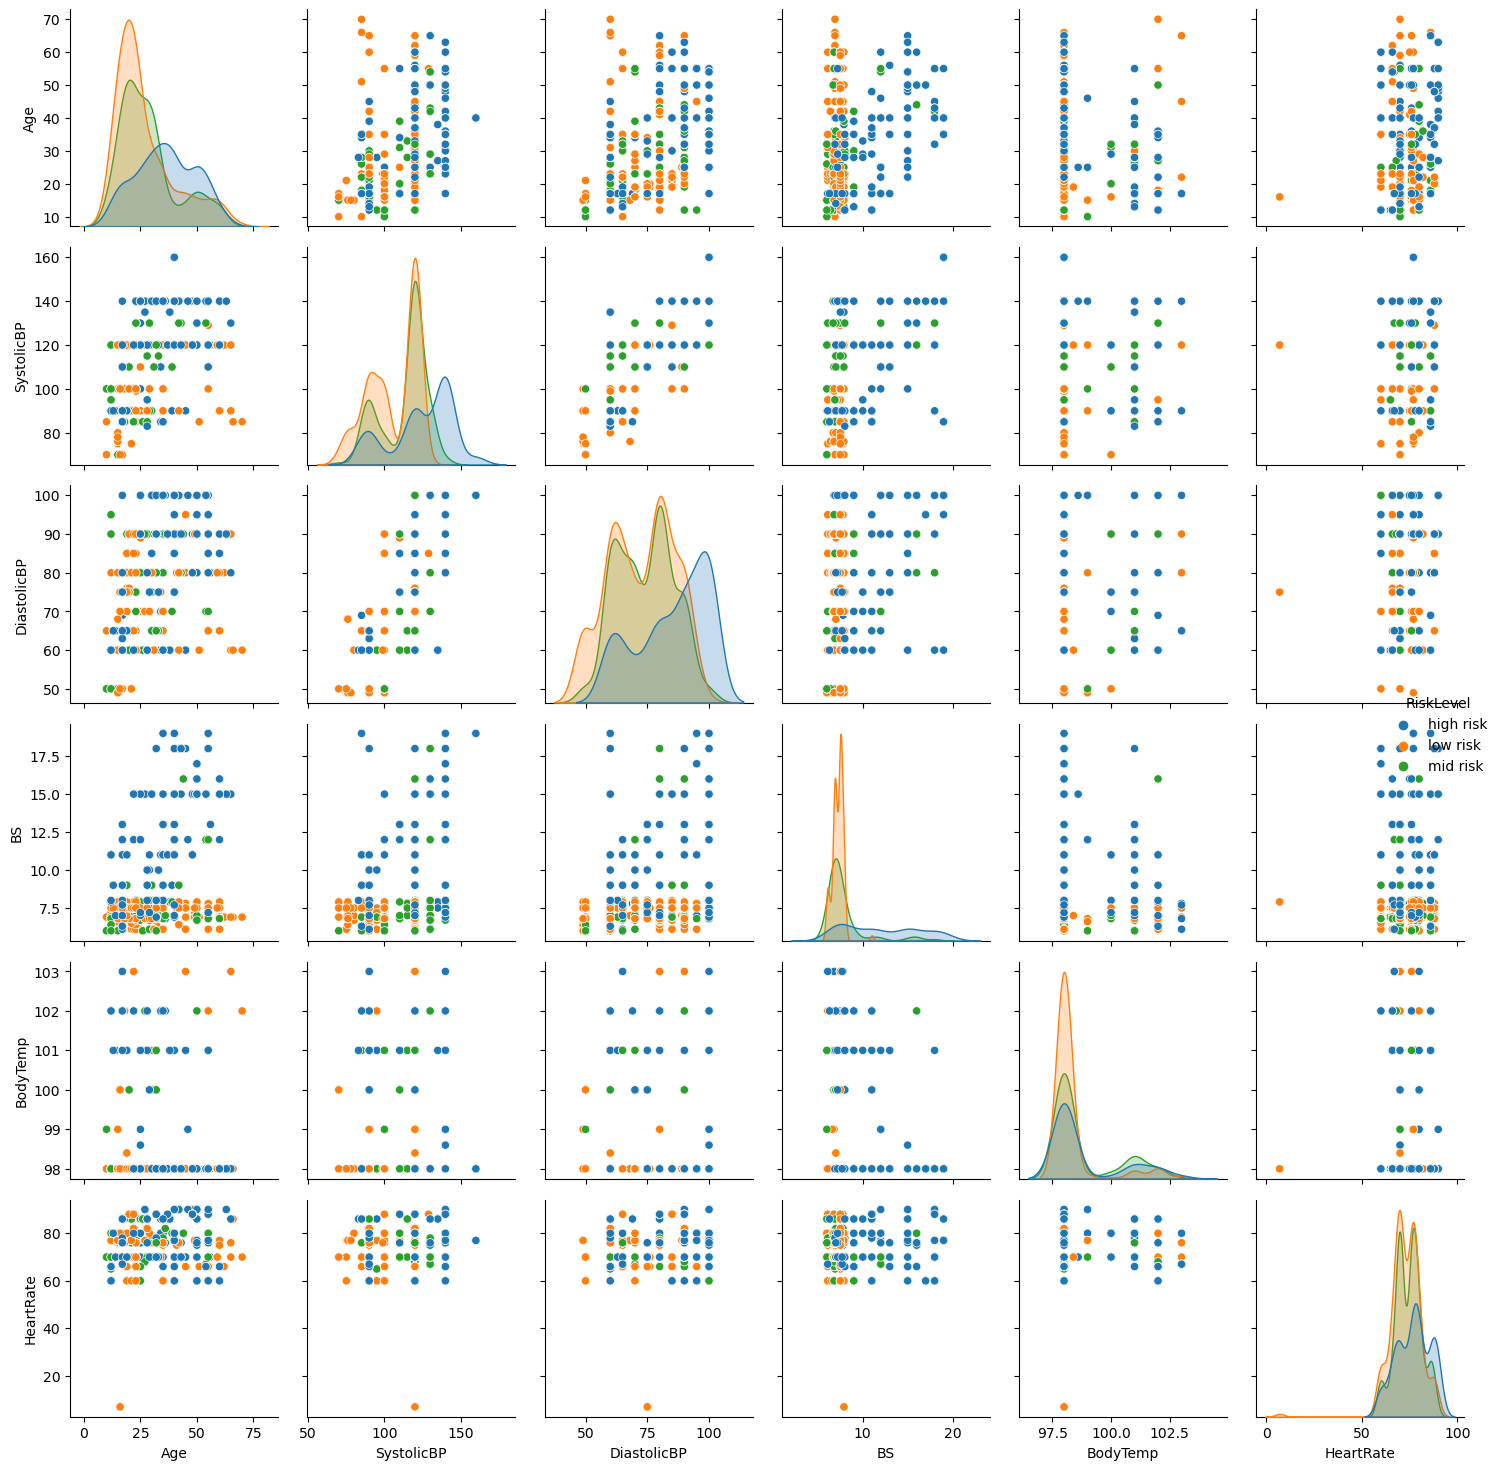

In [8]:
# View correlations of features according to health risk
sns.pairplot(dataset, hue= 'RiskLevel')

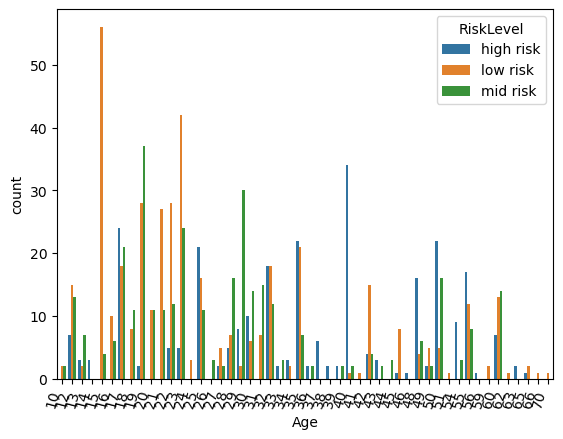

In [ ]:
# Risk level plotted by age
cplot = sns.countplot(x = 'Age', data = dataset, hue= 'RiskLevel')
cplot.set_xticklabels(cplot.get_xticklabels(), rotation=75, ha="right")
plt.show()

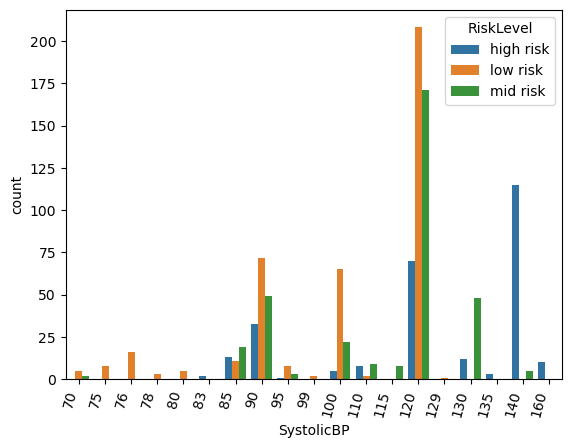

In [ ]:
# Risk level plotted by SystolicBP
cplot = sns.countplot(x = 'SystolicBP', data = dataset, hue= 'RiskLevel')
cplot.set_xticklabels(cplot.get_xticklabels(), rotation=75, ha="right")
plt.show()

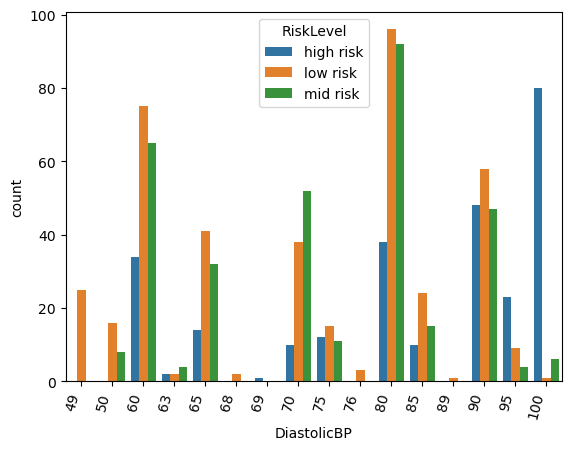

In [ ]:
# Risk level plotted by DiastolicBP
cplot = sns.countplot(x = 'DiastolicBP', data = dataset, hue= 'RiskLevel')
cplot.set_xticklabels(cplot.get_xticklabels(), rotation=75, ha="right")
plt.show()

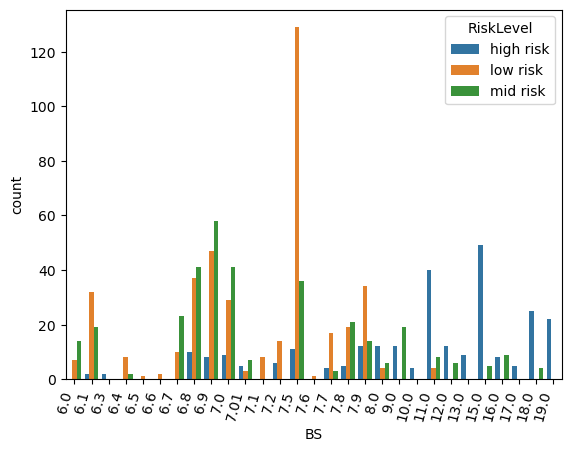

In [ ]:
# Risk level plotted by Blood Sugar
cplot = sns.countplot(x = 'BS', data = dataset, hue= 'RiskLevel')
cplot.set_xticklabels(cplot.get_xticklabels(), rotation=75, ha="right")
plt.show()

<Axes: xlabel='BodyTemp', ylabel='count'>

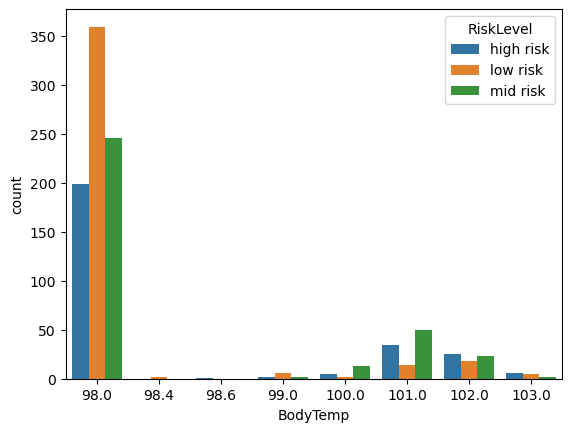

In [ ]:
# Risk level plotted by Body Temp
sns.countplot(x = 'BodyTemp', data = dataset, hue= 'RiskLevel')

<Axes: xlabel='HeartRate', ylabel='count'>

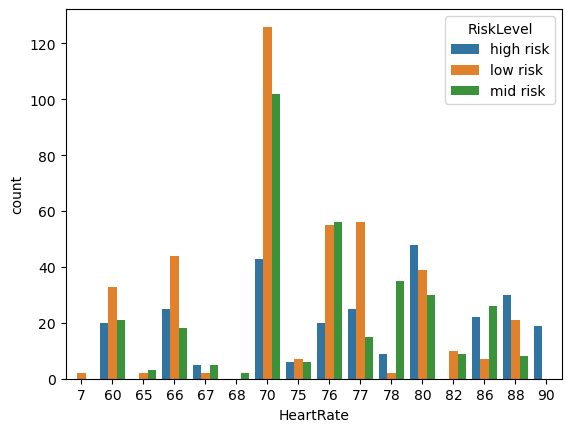

In [ ]:
# Risk level plotted by Heart Rate
sns.countplot(x = 'HeartRate', data = dataset, hue= 'RiskLevel')

#### 2.2 Key Observations <a class="anchor" id="KeyObs"></a>

From the above plots I can clearly observe nome features that identify if a patient is low, mid, or high risk.

    * Low and Mid risk patients tend to be younger in age, the ages of 15 to 24 have the highest grouping of low risk patients. After the age of 40 there is a jump in high risk patients.
    * Blood pressure can also be used to indicate risk levels. It appears that patients with high blood pressure are more likely to be categorized as high risk.
    * Blood Sugar levels seem to be one of the biggest indicators of what a patients risk level will be. Having a mmol/L level around the 7.5 clearly correlates with low risk patients with high risk patients appearing more common at the 11.0. This could be because higher blood sugar levels are linked to gestational diabetes.
    * Body Temperature doesn't seem to have any risk indicators and it will be dropped before the model is trained
    * Heart rate has a similar relationship to Blood pressure with healthy heart rates (66 to 77) indicating low risk patients and high heart rates (80 and above) showing a drop in low risk patients being present. 

## 3 Neural Network Model <a class="anchor" id="NNmodel"></a>

#### 3.1 Model Building <a class="anchor" id="MB"></a>

In [ ]:
# One Hot Encoding for risk levels

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_data = pd.DataFrame(enc.fit_transform(dataset[['RiskLevel']]).toarray())

final_dataset = dataset.join(enc_data)

final_dataset.drop('RiskLevel', axis=1, inplace=True)
final_dataset.columns = ['Age', 'SystolicBP', 'DiastolicBP','BS', 'BodyTemp','HeartRate','HighRisk','LowRisk','MidRisk']

#Drops patient with heart-rate of 7 as this isn't possible
final_dataset.drop(index=final_dataset[final_dataset['HeartRate'] == 7].index, inplace = True)

final_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,HighRisk,LowRisk,MidRisk
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,29.899209,113.184783,76.463439,8.727619,98.666403,74.434783,0.268775,0.399209,0.332016
std,13.473560,18.419618,13.899372,3.296583,1.372421,7.521857,0.443542,0.489978,0.471169
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000,0.000000,0.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000,0.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,0.000000,0.000000,0.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,1.000000,1.000000,1.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,1.000000,1.000000,1.000000


In [ ]:
# Split into train and test datasets

X = final_dataset.drop(columns=['HighRisk','LowRisk','MidRisk'])
y = final_dataset[['HighRisk','LowRisk','MidRisk']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state= 20)

In [ ]:
# Apply Standard Scaler to values

stsc = StandardScaler()
X_train = stsc.fit_transform(X_train)
X_train

array([[-0.2247619 ,  0.34990831,  0.96657559, -0.58884223,  2.44377759,
        -0.84310903],
       [-0.8938099 , -0.74771025, -0.48243702, -0.61944922, -0.48340048,
         0.2168369 ],
       [ 1.85672076,  0.34990831,  0.24206929, -0.55823523,  2.44377759,
         0.74680987],
       ...,
       [-0.6707939 ,  0.34990831,  0.24206929, -0.52762824, -0.48340048,
         0.34933014],
       [-0.96814857, -1.29651953, -1.20694332, -0.2521653 ,  1.71198307,
         0.2168369 ],
       [-0.37343924, -0.74771025,  0.96657559, -0.55823523, -0.48340048,
         0.2168369 ]])

In [ ]:
stsc = StandardScaler()
X_test = stsc.fit_transform(X_test)
X_test

array([[ 2.26386344,  0.44978701,  0.30348887, -0.3651049 , -0.4953774 ,
         0.03798073],
       [-0.47384036,  0.44978701, -0.04815634, -0.21818285, -0.4953774 ,
        -0.63834275],
       [-0.54783235,  0.44978701,  0.65513408, -0.3651049 , -0.4953774 ,
         1.79642178],
       ...,
       [-0.91779232, -1.12537278, -1.10309196, -0.54141135,  1.65951431,
         0.17324542],
       [-0.02988839, -0.60031952, -0.39980155, -0.57079576, -0.4953774 ,
         0.71430421],
       [ 0.41406357,  1.49989353,  1.7100697 ,  0.07566123, -0.4953774 ,
        -1.17940154]])

In [ ]:
# Establish Neural Network

nn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=6,),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(rate= 0.6),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(rate= 0.6),
    tf.keras.layers.Dense(units=3, activation="softmax"),
])

nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2128)              14896     
                                                                 
 dropout_18 (Dropout)        (None, 2128)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               272512    
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 3)                 387       
                                                                 
Total params: 287795 (1.10 MB)
Trainable params: 287795 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiles model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fits model
history = nn.fit(X_train, y_train,  batch_size= 32, epochs = 2000, validation_data = (X_test, y_test))

Epoch 1/2000


26/26 [==============================] - 1s 11ms/step - loss: 1.0562 - accuracy: 0.4512 - val_loss: 0.9892 - val_accuracy: 0.5911
Epoch 2/2000
26/26 [==============================] - 0s 7ms/step - loss: 0.9606 - accuracy: 0.5612 - val_loss: 0.9179 - val_accuracy: 0.6502
Epoch 3/2000
26/26 [==============================] - 0s 6ms/step - loss: 0.9002 - accuracy: 0.5810 - val_loss: 0.8715 - val_accuracy: 0.6502
Epoch 4/2000
26/26 [==============================] - 0s 6ms/step - loss: 0.8720 - accuracy: 0.6156 - val_loss: 0.8406 - val_accuracy: 0.6601
Epoch 5/2000
26/26 [==============================] - 0s 6ms/step - loss: 0.8282 - accuracy: 0.6329 - val_loss: 0.8192 - val_accuracy: 0.6700
Epoch 6/2000
26/26 [==============================] - 0s 6ms/step - loss: 0.8148 - accuracy: 0.6477 - val_loss: 0.8028 - val_accuracy: 0.6601
Epoch 7/2000
26/26 [==============================] - 0s 5ms/step - loss: 0.7975 - accuracy: 0.6366 - val_loss: 0.7942 - val_accuracy: 0.6601
Epoch 8/2000
26/26

##### Personal Note: I have not been back to work on this notebook for a couple of weeks. That is because my baby daughter was born on 28/10/2023. Life has been busy but amazing!

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


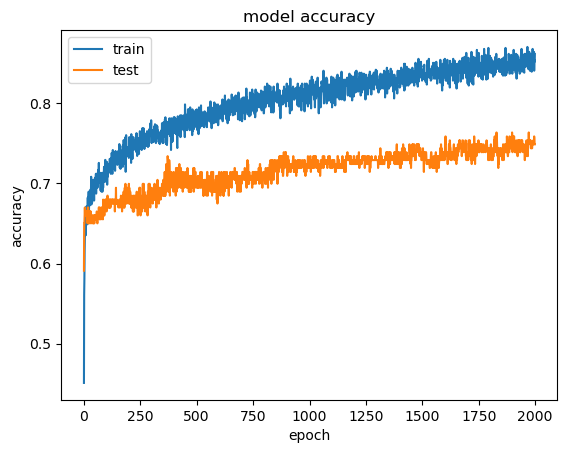

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


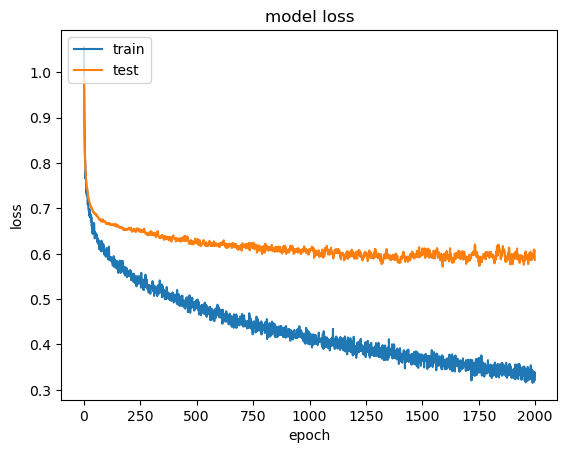

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

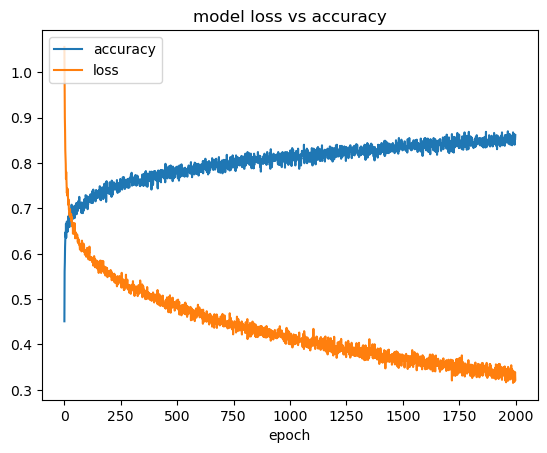

In [ ]:
# summarize history for loss vs accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
# Evaluates models
nn.evaluate(X_test, y_test, batch_size = 32)

7/7 [==============================] - 0s 0s/step - loss: 0.5867 - accuracy: 0.7488


[0.5867229700088501, 0.7487684488296509]

#### 3.2 Conclusions <a class="anchor" id="conc"></a>

This serves as a great base model for my Neural Network. At this stage I will continue to evaluate my model to try and find new ways to improve the overall performance.

Overall, I am pleased with the outcome and plan to come back to this project to re-evaluate and continue my education in this field.

A note on Results, as I am using this model as an education tool I will often come back to it to test different layer combinations. Below I will post some of the combinations and results for reference:

### Preformed 01/12/2023

Establish Neural Network
- nn = tf.keras.models.Sequential([
-     tf.keras.layers.Input(shape=6,),
-     tf.keras.layers.Dense(units=256, activation="relu"),
-     tf.keras.layers.Dropout(rate= 0.3),
-     tf.keras.layers.Dense(units=128, activation="relu"),
-     tf.keras.layers.Dropout(rate= 0.3),
-     tf.keras.layers.Dense(units=3, activation="softmax"),
- ])

nn.summary()

Compiles model
- optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
- nn.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics= ['accuracy'])

Fits model
- history = nn.fit(X_train, y_train,  batch_size= 32, epochs = 2000 , validation_data = (X_test, y_test))

Results:

7/7 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.8227
[0.5715042352676392, 0.8226600885391235]

### Preformed 07/12/2023

Establish Neural Network

- nn = tf.keras.models.Sequential([
-     tf.keras.layers.Input(shape=6,),
-     tf.keras.layers.Dense(units=128, activation="relu"),
-     tf.keras.layers.Dropout(rate= 0.6),
-     tf.keras.layers.Dense(units=128, activation="relu"),
-     tf.keras.layers.Dropout(rate= 0.6),
-     tf.keras.layers.Dense(units=3, activation="softmax"),
- ])

nn.summary()

Compiles model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics= ['accuracy'])

Fits model
history = nn.fit(X_train, y_train,  batch_size= 32, epochs = 2000, validation_data = (X_test, y_test))

7/7 [==============================] - 0s 0s/step - loss: 0.5867 - accuracy: 0.7488
[0.5867229700088501, 0.7487684488296509]

Notes: This new learning rate (0.0001) improves the loss value results, Also noted some accuracy decreases when epochs is lowered